# Spotify Features Project
Some simple analysis on the features of the Spotify's audio database 

Source of data: https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db  
Additional description of the features:
https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

In [1]:
# Extract data from compressed zip
import zipfile
with zipfile.ZipFile('SpotifyFeatures.csv.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [2]:
import pandas as pd
df = pd.read_csv('SpotifyFeatures.csv')

In [3]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [4]:
df.shape

(232725, 18)

Remove track_id as it is irrelevant for our purposes.

In [5]:
df = df.drop(['track_id', 'artist_name', 'track_name'], axis=1)

In [6]:
df.head()

,genre,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


### Data visualization

In [7]:
df_groupby_genre = df.set_index(df.genre)
df_groupby_genre = df_groupby_genre.drop(columns='genre')

# quantitative attributes
quant_attr = df_groupby_genre.columns[df_groupby_genre.dtypes != object]
# qualitative qttributes
quali_attr = df_groupby_genre.columns[df_groupby_genre.dtypes == object]

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

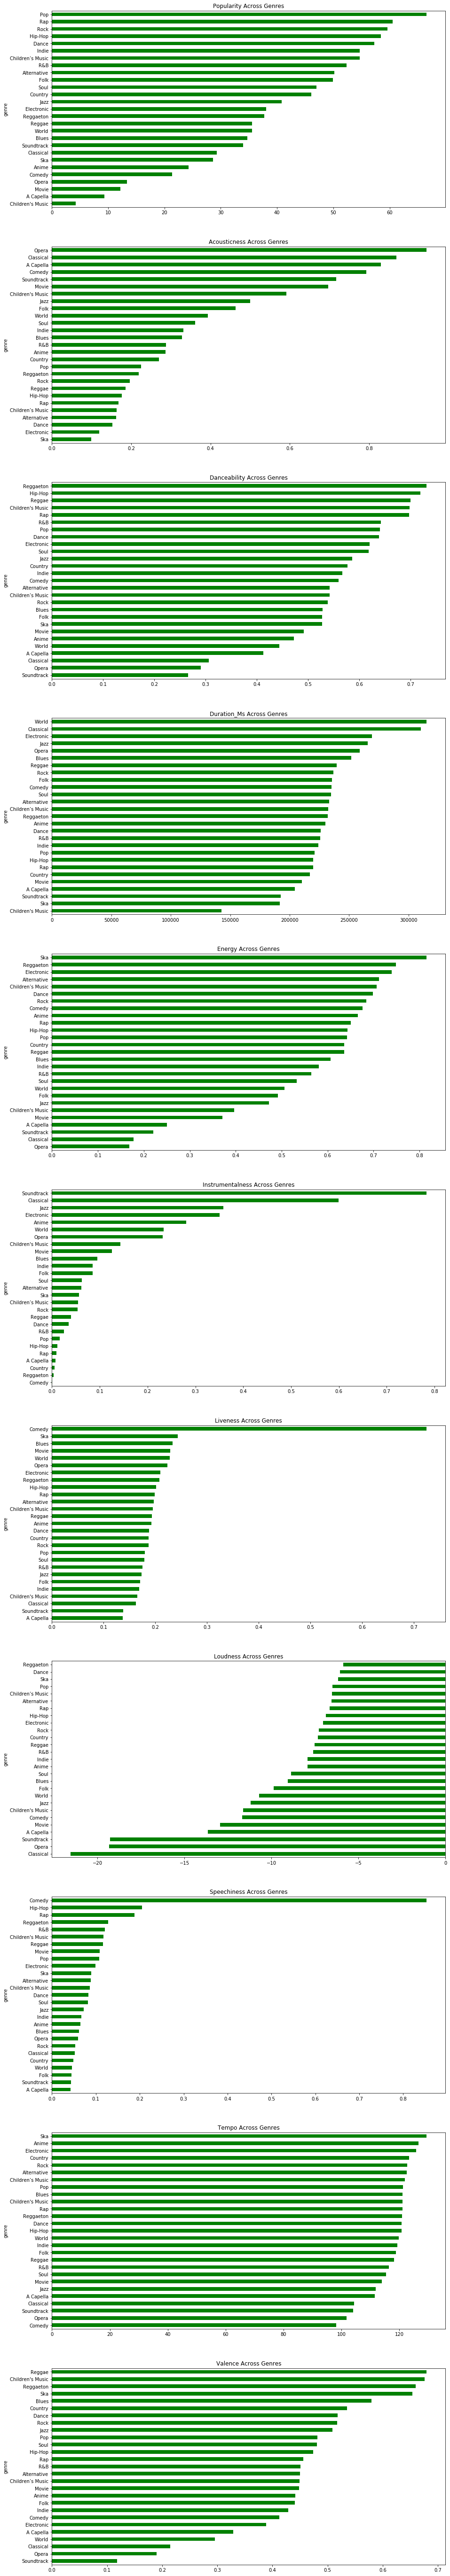

In [9]:
fig, axes= plt.subplots(len(quant_attr), 1, figsize=(15, 100))

for idx, attr in enumerate(quant_attr):
    axes[idx].set(title="{} across genres".format(attr).title()) 
    df_groupby_genre[attr].mean(level='genre').sort_values(ascending=True).plot.barh(
        ax=axes[idx], color='g')


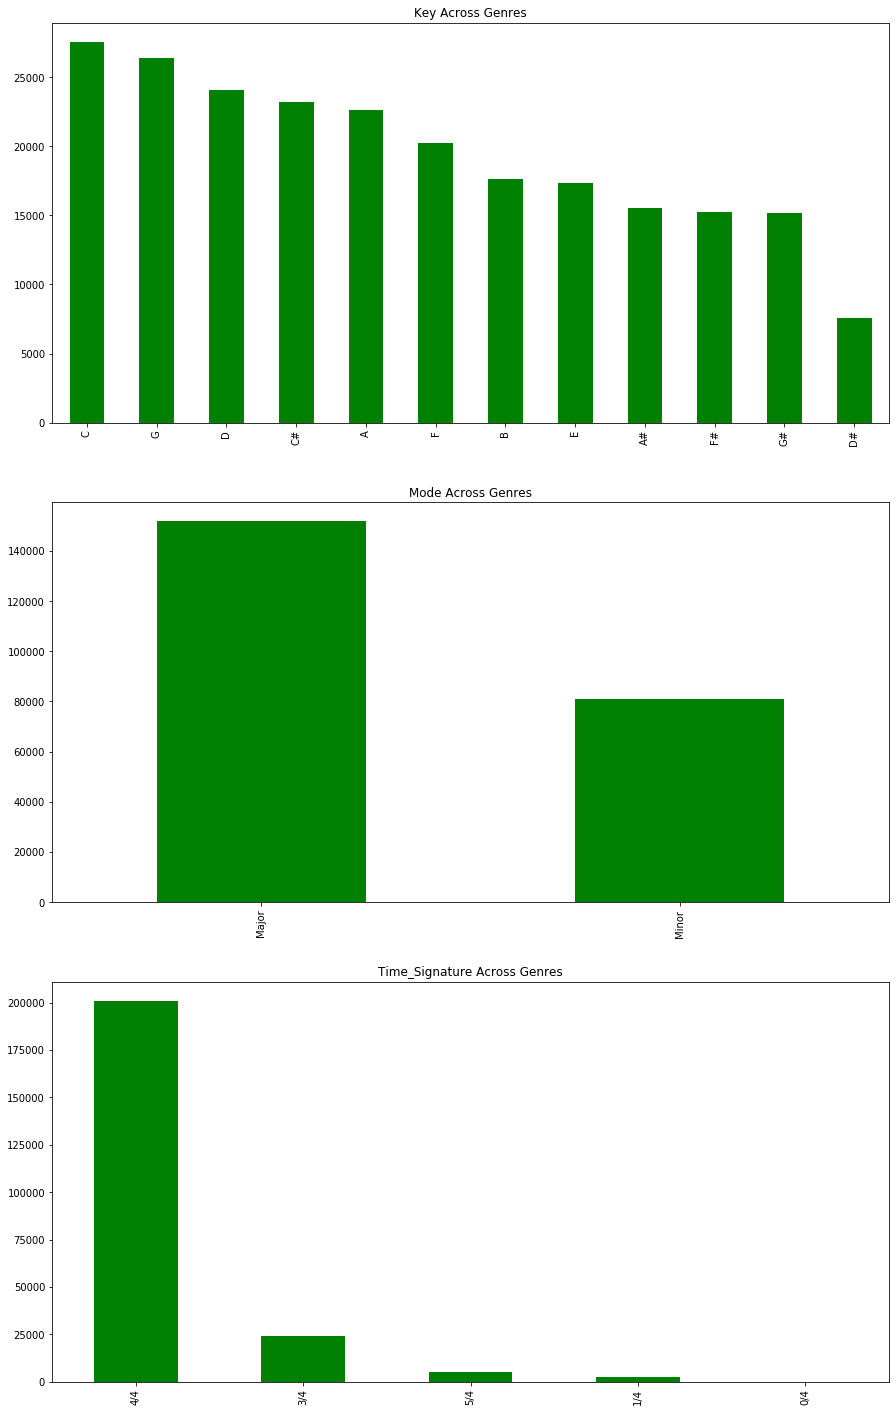

In [10]:
fig, axes= plt.subplots(len(quali_attr), 1, figsize=(15, 25))

for idx, attr in enumerate(quali_attr):
    axes[idx].set(title="{} across genres".format(attr).title()) 
    df_groupby_genre[attr].value_counts().sort_values(ascending=False).plot.bar(
        ax=axes[idx], color='g')


### Results
As shown, the top 3 popular genres in Spotify are:
1. Pop (obviously)
2. Rap
3. Rock

Top 3 genres with the most instrumental components are:
1. Soundtrack (for obvious reasons)
2. Classical
3. Jazz

For key signatures, the three most common are:
1. C
2. G
3. D

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/Circle_of_fifths_deluxe_4.svg/800px-Circle_of_fifths_deluxe_4.svg.png"
width="400" height="400">
<p style="text-align: center">Figure: Circle of fifth showing the 12 keys in music theory.
<br>
As shown, C, G, D key are alongside each other, from no sharps (C) to 1 sharp (G) and 2 sharps (D).</p>

(Source: https://en.wikipedia.org/wiki/Key_signature)

Time signature
- 4/4 is the most common time signature. In fact, it is also known as the "Common time" time signature.  
- 3/4, the second common time signature is widely used in waltz, ballad and R&B.  
<br>
(Source: https://en.wikipedia.org/wiki/Time_signature)

## Some basic machine learning (classification - KNN)

### Label encoding

In [11]:
from sklearn import preprocessing
le = {}
for k in df.columns[df.dtypes == object]:
    le[k] = preprocessing.LabelEncoder()
    df[k] = le[k].fit_transform(df[k])

### Time signature

In [12]:
df_data = df.drop(['time_signature'], axis=1)

In [13]:
df_target = df['time_signature']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_data, df_target, random_state=0)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.82


In [16]:
import random
test_index = random.randint(0, df.shape[0]-1)
X_new = [df_data.iloc[test_index]]
y_new = df_target.iloc[test_index]
prediction = knn.predict(X_new)
to_time_sign = le['time_signature'].inverse_transform
print("Prediction: {}".format(to_time_sign(prediction)))
print("Actual value: {}".format(to_time_sign([y_new])))

Prediction: ['4/4']
Actual value: ['4/4']


### Mode (Major/Minor)

In [17]:
df_data = df.drop(['mode'], axis=1)

In [18]:
df_target = df['mode']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_data, df_target, random_state=0)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.70


The mode of the track can be estimated correctly 70% of the time.

In [21]:
import random
test_index = random.randint(0, df.shape[0]-1)
X_new = [df_data.iloc[test_index]]
y_new = df_target.iloc[test_index]
prediction = knn.predict(X_new)
to_mode = le['mode'].inverse_transform
print("Prediction: {}".format(to_mode(prediction)))
print("Actual value: {}".format(to_mode([y_new])))

Prediction: ['Minor']
Actual value: ['Minor']


In [22]:
pd.value_counts(to_time_sign(df['time_signature']))

4/4    200760
3/4     24111
5/4      5238
1/4      2608
0/4         8
dtype: int64

In [23]:
pd.value_counts(to_mode(df['mode']))

Major    151744
Minor     80981
dtype: int64

### Interpretation
With score of 0.82 and 0.70, the model is not very accurate. Plus, as shown from the data visualization at the beginning and the value counts, the value is apparently skewed to the mode.  
Thus, the classification on time signature and key mode is unsuccessful.  
Similarly, other classes such as genres does not yield positive results.